###**JAMBOREE EDUCATION - LINEAR REGRESSION**

**Problem statement:**
- **Objective:** To Predict the chance of admission to a graduate Program Based on GRE, TOEFL, GPA, research experience, and to Understand key influencing factors using Linear Regression.

---

**S-SITUATION:**
- Jamboree Education, a leader in test preparation for GRE/GMAT/SAT aspirants, Launched a feature to predict a student's chance of admission into lvy league colleges.
- They wanted to use data-driven methods to understand key factors influencing graduate admissions and improve their website's prediction system.

---

**T-TASK**
- The Objective was to analyze the dataset containing student's academic profiles(GRE, TOEFL, etc.) and build a predictive model using Linear Regression.
- The goal was not only to forecast the chance of admission but also to identify and interpet Which features are most signiicant in the decision process

---

**A-ACTION:**
- **Performed EDA:**
  - Cleaned the dataset by removing the serial number and checking for nulls or duplicates
  - Used Histograms and boxplots to understand the distribution and outliers.
  - Created a correlation heatmap to identify relationships between features.
- **Built Linear Regression Model (Statsmodels)**
  - Trained a model using GRE, TOEFL, university Rating, SOP, LOR, CGPA, and Research
  - Interpreted the statistical significance of variables using P-Values and coefficients.
- **Validated Assumptions of Linear Regression:**
  - Checked Multicollinearity using VIF and ensured no feature had VIF > 5.
  - Verified mean of residuals = 0
  - Checked Linearity, Homoscedasticity, and Normality of residuals using scatter and QQ Plots.
- **Evaluated Model Performance:**
  - Measured metrics : MAE, RMSE, R square, Adjusted R square on bth train and test sets.
  - Compared results with ridge & Lasso regressions for regularizations benefits.

###**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###**LOAD DATASET**

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')

###**PREVIEW THE DATASET**

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


###**DATASET**

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


###**SHAPE OF THE DATASET**

In [ ]:
df.shape

(500, 9)

###**DATASET INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#Observations:
- The dataset has 500 rows and 9 columns
- Each row represents a student's Profile applying for admission.
- There are No missing values in any column, All columns have 500 entries
- The data types are a mix of:
  - Integer for scores and flags like GRE, TOEFL, University Rating, Research.
  - Float for SOP, LOR, CGPA, and chance of Admit.

###**CHECKING DUPLICATES**

In [ ]:
df.duplicated().sum()

np.int64(0)

###**DROP Serial No.**

In [ ]:
df.drop("Serial No.", axis=1, inplace=True)

###**STATISTICAL SUMMARY**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


###**Overview**
- The dataset has 500 students and covers various aspects of their academic and research Profiles
- The statistics Include Mean, Minimum, maximum, standard deviation, & Percentile values (25%, 50%, 75%) for each column.
- All values are within logical ranges and no missing data is present.

#Observation:
- The average GRE score is around 316, and the TOEFL score is about 107, Indicating most applicants have strong test score, Approximately Normal Distribution.
- University ratings range from 1 to 5, with an average of 3.1, suggesting a mix of applicants across various university tiers, Approximately Normal Distribution.
- SOP and LOR ratings also vary between 1 and 5, with average values around 3.3 - 3.4.
- SOP Slightly-Left-Skewed Distribution, LOR Approximately Normal.
- The CGPA scores are generally high, averaging 8.57 on a 10-Point scale, and range from 6.8 to 9.92. Approximately Normal Distribution.
- About 56% of students have prior research experience.
- The Target Variable, "Chance of admit" has an average of 0.72 and ranges from 0.34 to 0.97. Slightly Right-Skewed Dsitribution.
- Showing most students have a moderate to high probability of admission.
- The serial No column serves only as an identifier and should be removed from analysis.


**Summary**
- Most continuous features like GRE, TOEFL, LOR, and CGPA are approximately normally distributed.
- SOP is slightly left-skewed, meaning more students have higher SOP scores.
- Chance of Admit is slightly right-skewed, meaning more students have higher chances, but a few have relatively lower chances.
- Research is a binary variable, so distribution shape doesn’t apply.

###**HANDLING OUTLIERS**

In [ ]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.isnull().sum().sum()

np.int64(0)

###**Univariate Analysis**

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


###**GRE Score**

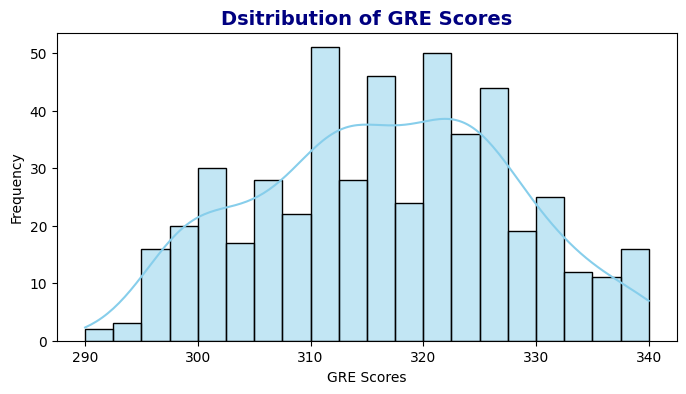

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(df['GRE Score'], bins = 20, kde = True, color = 'skyblue')
plt.title("Dsitribution of GRE Scores", fontsize = 14, color = 'navy', weight = 'bold')
plt.xlabel("GRE Scores")
plt.ylabel("Frequency")
plt.show()

#Overview:
- The histogram shows the distribution of GRE scores for students applying for graduate admission.
---
#Observation:
- The distribution is fairly normal, most students scored around the middle values (310-325).
- The most common scores fall between 310 and 325, where the frequency is highest (over 50 students)
- Very few students scored below 295 or above 335, suggesting these are rare scores.
- There might be a slight right skew, but it's not very strong, overall the distribution is close to normal
- GRE Scores are spread from around 290 to 340, showing a wide range of student performance.

###**TOEFL Score Distribution**

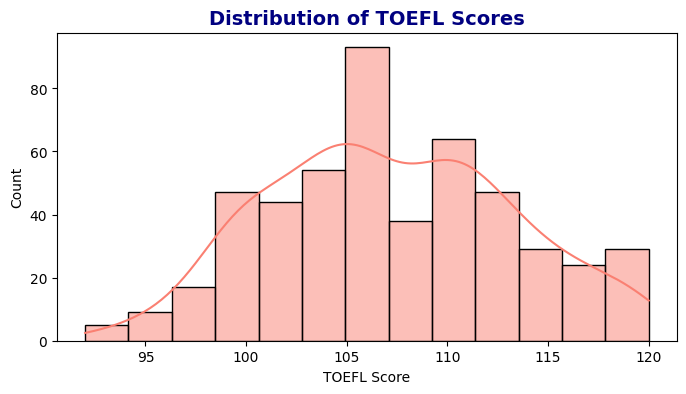

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(df['TOEFL Score'], kde = True, color = 'salmon')
plt.title("Distribution of TOEFL Scores", fontsize = 14, color = 'navy', weight = 'bold')
plt.xlabel("TOEFL Score")
plt.ylabel("Count")
plt.show()

###Observation:
- Most students scored between 100 and 115
- The peak is around a TOEFL score of 105
- The graph is slightly right skewed, more students scored below the peak than above.
- Only a few students scored below 95 or above 118
- The Distribution is not perfectly symmetrica, but still centered around 105-110.

###**University Rating Distribution**

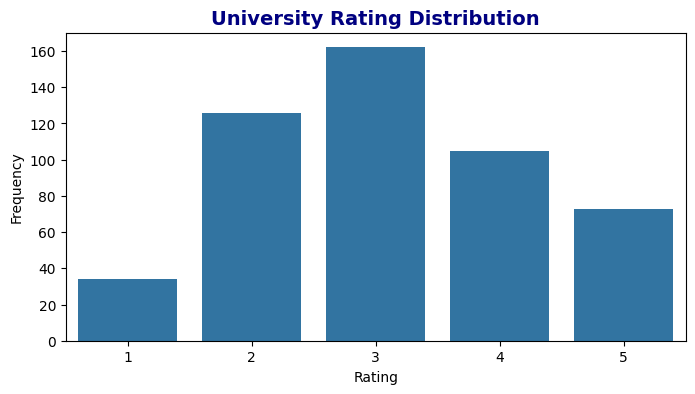

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='University Rating', data=df)
plt.title("University Rating Distribution", fontsize=14, color='navy', weight='bold')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#Observation:
- Most students applied to universities with a rating of 3
- Very few students applied to universities with a rating of 1.
- Rating 2 and 4 universties also had a good number of applicants
- The least popular rating is 1, while 3 is the most popular
- The Distribution forms a bell-like shpae, peaking at rating 3 and tapering off on both.

###**SOP Strength Dsitribution**

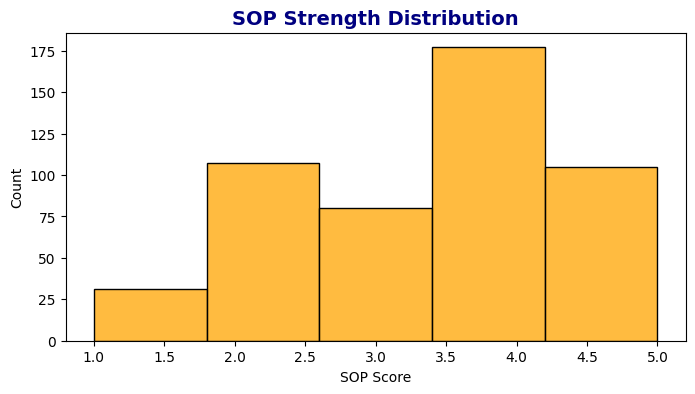

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['SOP'], bins=5, color='orange')
plt.title("SOP Strength Distribution", fontsize=14, color='navy', weight='bold')
plt.xlabel("SOP Score")
plt.ylabel("Count")
plt.show()

#Observation:
- Most students have an SOP score between 3.35 and 4.5, indicating strong SOP's
- Very few students have a low SOP score near 1.0
- SOP scores around 2.0-2.5 are also quite common
- Scores around 3.0 are less frequent than expected
- Overall, The SOP distribution shows a right-skewed pattern, with many students having higher SOP strengths.

###**LOR Strength Dsitribution**

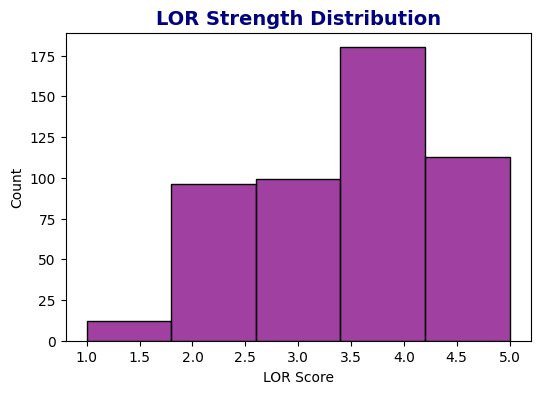

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['LOR '], bins=5, color='purple')
plt.title("LOR Strength Distribution", fontsize=14, color='navy', weight='bold')
plt.xlabel("LOR Score")
plt.ylabel("Count")
plt.show()

#Observation:
- Most students have LOR scores between 3.5 and 4.5, showing strong recommendation letters.
- Very few students received a low LOR score around 1.0
- Scores in the 2.0 to 3.0 range are moderately common.
- The most frequent LOR score group is 3.5-4.0, similar to SOP trends
- Overall, Students tend to have good LOR scores.

###**Dsitribution of CGPA**

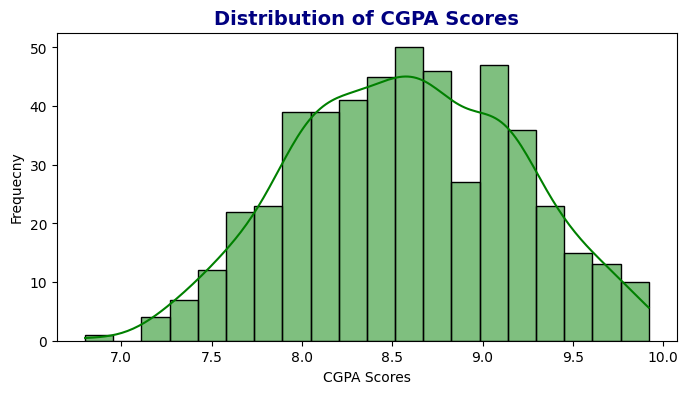

In [ ]:
plt.figure(figsize = (8,4))
sns.histplot(df['CGPA'],bins = 20,kde = True, color = 'green')
plt.title("Distribution of CGPA Scores", fontsize = 14, color = 'navy', weight = 'bold')
plt.xlabel("CGPA Scores")
plt.ylabel('Frequecny')
plt.show()

#Observation:
- Most students have CGPA's between 8.0 and 9.0
- The highest frequency is around a CGPA of 8.6
- The Distribution forms a bell-shaped curve, showing normal Distribution
- Very few students have CGPA below 7.0 or above 9.8
- Overall, Students have strong academic performance with high CGPA's

###**Research Experience Distribution**

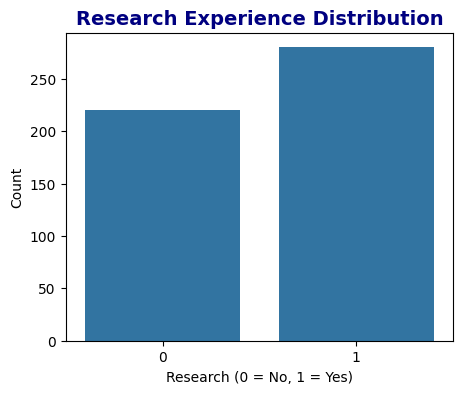

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Research', data=df)
plt.title("Research Experience Distribution", fontsize=14, color='navy', weight='bold')
plt.xlabel("Research (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

#Observation:
- More students have research experience (1) than those who don't (0)
- Around 275 students have research experience, while about 220 students do not
- There is a clear positive trend toward research involvement

###**Distribution of Admission Chances**

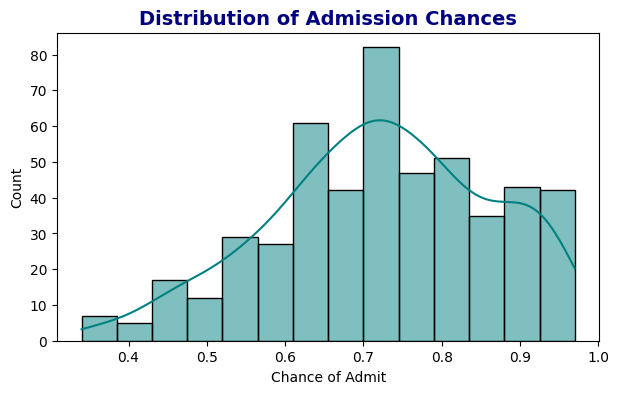

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['Chance of Admit '], kde=True, color='teal')
plt.title("Distribution of Admission Chances", fontsize=14, color='navy', weight='bold')
plt.xlabel("Chance of Admit")
plt.ylabel("Count")
plt.show()

#Observation:
- Most Students have a chance of admit between 0.6 and 0.8
- The peak is around 0.7, where the highest number of students fall.
- Very few students have a chance below 0.4
- The Distribution is slightly right-skewed, meaning fewer students have very high chances
- Overall, chances of admission are generally high for most students in this dataset.

###**Bivariate Analysis**

###**GRE vs. Chance od Admit**

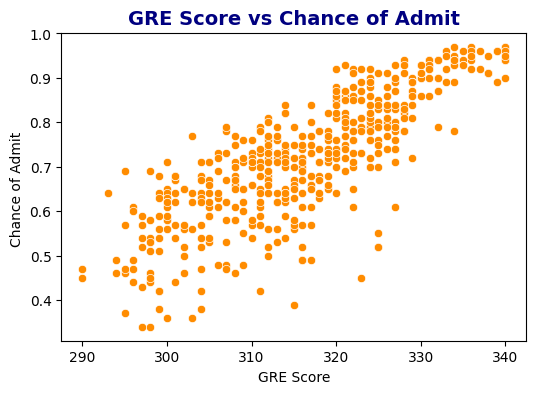

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df, color='darkorange')
plt.title("GRE Score vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observations:
- Higher GRE scores lead to higher chances of admission
- There's a strong positive correlation between GRE score and admission chance
- Most students with GRE scores above 330 have a chance above 0.9
- Students with GRE scores below 300 usually have a chance below 0.7
- The data points from an upward trend, showing GRE score is an important factor.

###**TOEFL Score vs. Chance of Admit**

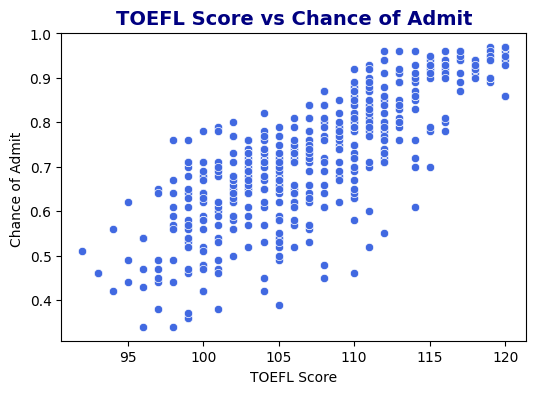

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TOEFL Score', y='Chance of Admit ', data=df, color='royalblue')
plt.title("TOEFL Score vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

###**Observation:**
- **Strong Positive Relationship:** As TOEFL scores increases, the chance of admission also increases.
- **High Scores = High Chances:** Scores of 110 and above almost always result in a high chance of admission
- **Variable at Lower Scores:** For scores below 110, the chance of admission is much more unpredictable
- **TOEFL ia a key factor:** The Overall trend shows that a higher score is a significant advantage
- **Other Factors Matter:** The spread of data points indicates that the TOEFL score isn't the only thing considered for admission.

###**University Rating vs Chance of Admit**

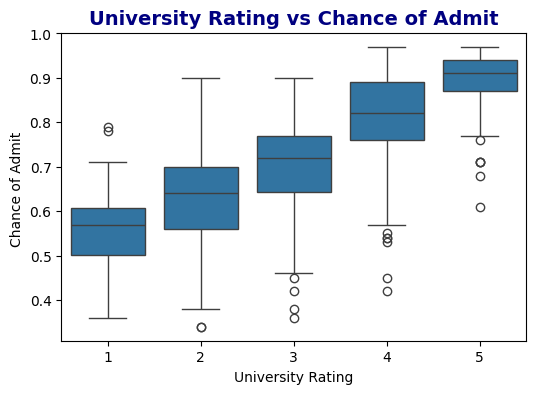

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'University Rating', y = 'Chance of Admit ', data=df)
plt.title("University Rating vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observation:
- The median chance of admission consistently rises as the university rating increases.
- The chance of admission are mostly consistently high for top-rated universities
- Th erange of possible admission chances is much wider for lower-rated universities
- The graph shows a very clear positive relationship between a university's rating and the chances of a student getting admitted
- The top-rated schools(rating 5 ) have the highesr median chance of admission and the least spread in their data.

###**SOP vs Chance of Admit**

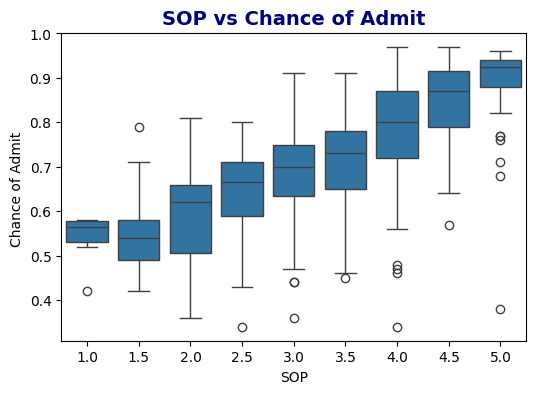

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='SOP', y='Chance of Admit ', data=df)
plt.title("SOP vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observation:
- The higher the SOP rating, the higher a student's chance of getting admitted
- A strong SOP leads to much higher chance of admission
- The median chance of admission nearly doubles from the lowest to the highest SOP rating
- There's still a wide range of outcomes, showing that a good SOP doesn't guarantee admission on its own
- Each step up in SOP quality consistently improves the chance of getting in.

###**LOR vs Chance of Admit**

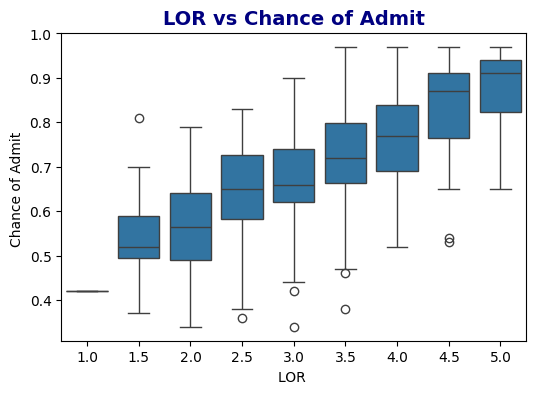

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='LOR ', y='Chance of Admit ', data=df)
plt.title("LOR vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observation:
- The better the letter of recommendation, the higher the chance of admission.
- A top-rated LOR significantly boosts your chances of getting in.
- Strong LOR's tend to lead to a more consistently high chance of admission
- There's a wide range of outcomes, showing that other parts of the application also matter.
- Each step up in LOR quality consistently improves the likelihood of a positive admission decision.

###**CGPA vs Chance of Admit**

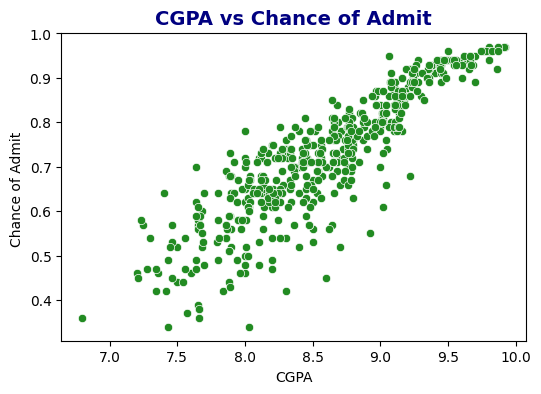

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df, color='forestgreen')
plt.title("CGPA vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observation:
- There is a very strong and positive link between a student's CGPA and their chance of admission
- Students with a high CGPA have a consistently high chance of getting in
- The graphs shows CGPA is one of the most important predictors of admission success
- For students with lower CGPAs the chance of admissions is much more varied, suggesting other factors become more influential
- The Increase in admission chance is less dramatic for very high CGPA than it is for students with lower grades.

###**Research vs Chance of Admit**

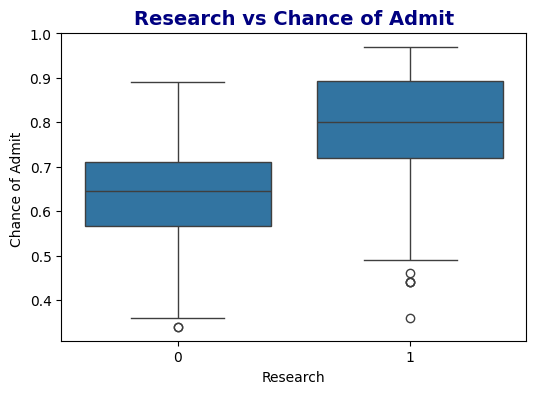

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Research', y='Chance of Admit ', data=df)
plt.title("Research vs Chance of Admit", fontsize=14, color='navy', weight='bold')
plt.show()

#Observation:
- Having research experience significantly increases your chance of getting admitted.
- The typical chance of admission for those with research is much higher than for those without
- Research experience acts as a strong positive factor that sets applicants apart
- While the chances are lower, many students without research still get admitted
- The graph clearly shows that research is a major element considered in the admission process.

###**Correlation Heatmap**

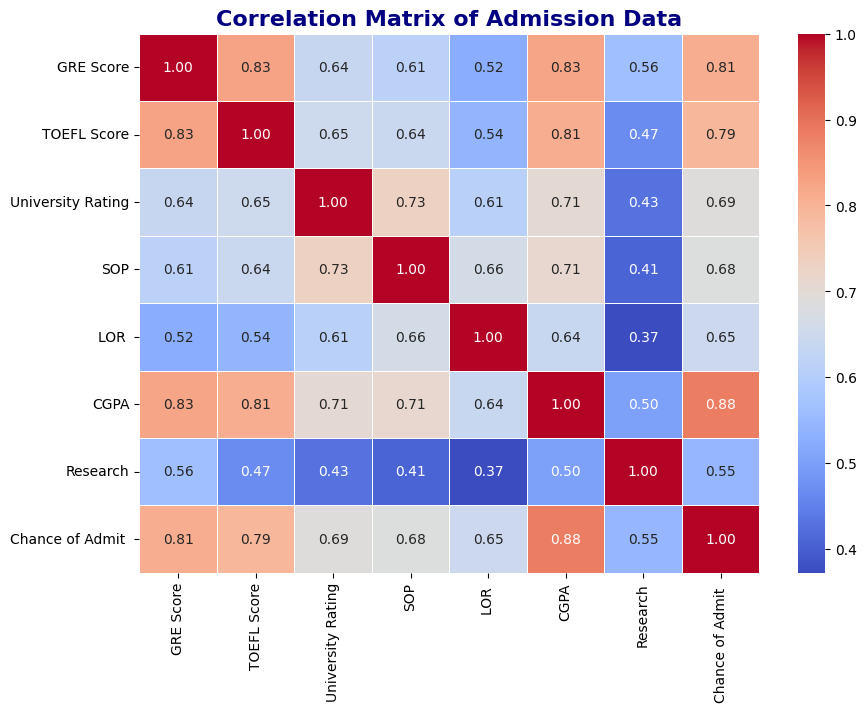

In [ ]:
plt.figure(figsize=(10,7))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Admission Data", fontsize=16, color='navy', weight='bold')
plt.show()

#Observation:
- **CGPA is the strongest Predictor:** CGPA has the highest correlation with **Chance of Admit** at 0.88, means CGPA is the most important factor in predicting their admissions
- **GRE & TOEFL:** Both GRE & TOEFL - 0.81, 0.79 also have a very strong positive correlation with the chance of admission
- **SOP & LOR have moderate impact:** The SOP & LOR have a moderately strong correlation with the chance of admit.


#What is Linear Regression
- Linear Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.
- It's used for predicting a continous outcome based on other factors.
- The Goal is to find the best-fitting straight line that minimizes the distance between the line and the data points.
---
- **Why we are using Linear Regression Here?**
  - We want to predict the Chance of admit(Continous value between 0 & 1)
  - **INTERPRETABILITY:** Coeffcients from Linear Regression tell us how much each factor(e.g. GRE, CGPA) Affets admission chances.
  - **BASELINE MODEL:** It's simple, effective, and a great starting point before using more complex models like Random Forest or XGBoost.
  - **ASSUMPTION TESTING:** Helps us check if the relationships in the data are linear, and whether predictors are redundant(Via VIF).

In [ ]:
# Predict the chance of Admit using features like
# GRE, TOEFL, university rating, SOP, LOE, CGPA & Research

###**LINEAR REGRESSION MODEL**

In [ ]:
import statsmodels.api as sm

x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          8.21e-180
Time:                        03:28:12   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

#Explnation-1:
- Instead of using Grdient Descent manually to optimize the weights(Coefficients)
- model = sm.OLS(y,x).fit()
- Uses **Ordinary Least Squares** from the statsmodels library to solve the linear regression analytically
---
#Gradient Descent:
- Iteratively updates weights to minimize errors
- Slow but flexible(Used in deep learning too)
---
#OLS(statsmodels)
- Used closed-form solution to calculate optimal weights directly.
- Fast and accurate for small to medium datasets.
- **Faster:** No Need to loop, just solve using matrix math
- **Detailed output:** You get coefficients, P-values, R^2
- **Accurate:** For Linear models, this is the exact solution
- **Easier:** No hyperparameters like learning rate or epochs
- **Interpretable:** Best suited when you want to expalin results
- **statsmodels.OLS is built for statistical analysis, It gives detailed insights like : t-tests, p-values, confidence interval, adjusted R^2**
- **sklearn.LinearRegression is focused on machine learning, it just fits the model to make predictions and evaluates it via metric like R^2, MSE**

#In the OLS regression result from statsmodels, you see p-values because:
- They are used to test hypotheses about the relationship between the independent variables(x) and the dependent variable(y or chance of admit)
- **WHAT IS THE HYPOTHESIS?**
  - For each feature, the regression model tests the null hypothesis:
    - H0: Bi = 0 (No effect) vs. H1: Bi != 0 (Significant effect)
    - Where Bi is the coefficient for the ith predictor (ex: GRE, CGPA...)
---
- **Why is this usefull p-value**
  - Is the feature truly useful in predicting the outcome
  - < 0.05 : statistically significant, reject the Null Hypothesis
  - > 0.05 : Not significant, the feature might not contribute meaningfull
---
- **Smaller the p-value, more confident we are that the feature is truly related to the outcome.**

#Explanation:
- This imports the statsmodels library which is used for statistical modeling
- **sm.OLS** Stands for **Ordinary Least Squares**, A method to estimate Linear regression.
- Splitting Data into Features-x, Target-y
  - Drop the column **Chance of Admit** from the DataFrame
  - Gives the Independent Variables(Features) Used for Prediction.
  - Y, This selects the column **Chance of Admit** as the Target variable that you wnat Predict.
- By Default, OLS does not include an intercept term
- Fits the OLS Model, creates the regression model,
  - **.fit()** runs the regresssion and fits the best line that minimizes errors.

#Observation:
- **Purpose:** Predict the Chance of admission using GRE, TOEFL, CGPA, SOP, LOR, University Rating, and Research
- **Model Used:** Ordinary Least squares(OLS) Linear Regression
- **Data Size:** 500 students records, 7 input features
- **R-Sqaured: 0.822,** The model explains 82.% of the variation in admission chances
- **Adjusted R-Sqaured:** 0.819 slightly penalty for number of predictors, but still strong.
- **F-Satistic P-value:** Very close to 0 (8021e - 180), Model is statistically significant Overall.

#Observation-02:
- **Coefficient Table Analysis:**
  - **GRE score:**
    - p-value: 0.000, 95% CI : 0.001, 0.003, significant
    - A unit Increase in GRE, increases Admit chance by 0.0019
  - **TOEFL Score:**
    - p-value : 0.002, 95% CI : 0.001, 0.005, significant
    - TOEFL positively affects admission chance
  - **University Ranring**
    - p-value : 0.119, 95% CI : -0.002, 0.013, Not significant (P>0.05)
    - Confidence interval crosses 0
  - **SOP:**
    - p-value : 0.728, 95% CI : -0.007, 0.010, Not significant, No impact in outcome.
  - **LOR:**
    - p-value: 0.000, 95% CI : 0.009, 0.025,
    - Highy significant, strong LOR helps admission
  - **CGPA:**
    - p-value : 0.000, 95% CI : 0.099, 0.138
    - Very significant CGPA is the strongest positive factor.
  - **Research:**
    - p-value : 0.000, 95% CI : 0.011, 0.038
    - Significant, having research experience boosts admission chance.
---
- **Threshold for significance: p<0.05**
- Variables with p< 0.05 are considered statistically significant
- Significant Predictores: GRE, TOEFL, LOR, CGPA, Research
- Not significant : University Rating, SOP
---
- **Why both R-Squared and Adjusted R-Squared are used**
- **R-Squared:**
  - It measures proportion of variance in the dependent variable explained by all independent varaibles.
- **Adjusted R-Squared:**
  - Same as R-Squared but penalizes adding irrelevant predictors.
---
- **2.What is variance in a regression context?**
  - Variance referes to much the predicted values differ from the values
  - It helps in understanding the spread or variability in the response variable
---
#Conclusion:
- **82% of the variation in the chance of admit is explained by the model using the input variables(Like GRE, TOEFL, CGPA....)**
- 82% of the differnce in the admission chances can be explained by your model.
- **The remaining 18% is due to:**
  - Noise(Random factors)
  - Missing variables like...Interview performance, essay quality.
---
#What does R-Squared tell about a model?
- R-squared tells you well your Linear regression model fits the data
- **R-Square = 1(100%)**
  - model perfectly explains the data(all points lie exactly on the regression line)
- **If R-Square = 0, Model explains none of the variation(Predictions are no better than Just guesing the mean)**
---
#Note
- **R-Squared can be misleading in multiple regression with many features, that's why we also check Adjusted R-Squared**
- **R-Square never decreses when you add more variables**


#Introduction to statsmodels, OLS, and Linear Regression Assumptions
- **What is statsmodels?**
  - Statsmodels is a python library for performing statistical modelling, especially regression analysis, hypothesis testing, and model diagnostics.
  - It provides more statistical insight than scikit-Learn, such as
    - P-values
    - Confidence Intervals
    - t-statistics
    - ANOVA tables
  - We use statsmodels when we want interpretability and detailed statistical summaries of models.
---
#What is OLS (Ordinary Least Squares)?
- **OLS is a linear regression technique that finds the best fitting line by minimizing the sum of squared residuals**
- **minimize∑(yi − y^i)^2**
  - **yi : Actual Value**
  - **y^i : Predicted value by the model**
- OLS gives us the line of the best fit and tells how well features explain the target variable.

##**Test Assumptions of Linear Regression**
- **1.LINEARITY:**
  - The relationship between the independent variable(x) and the Dependent variable (Y) is a straight Line.
  - If the relationship isn't Linear, our model will fail to capture the true pattern in the data, leading to inaccurate predictions.
---
- **2.Normality of Residuals:**
  - The errors(residuals) of the model should follow a normal distribution
  - If this assumption is violated, the statistical tests (like t-tests and F-tests) and confidence intervals become unreliable, This is especially for smaller sample sizes.
---
- **3.Homoscedasticity:**
  - The variance of the residuals is constant across all levels of the independent variable.
  - The spread of the residuals shuld be roughly the same throughout the data.
  - If the variance changes, our model's standard errors will be baised, making it difficult to trust the p-values and confidence intervals
---
- **4.No Multicollinearity**
  - The independent variables should not be highly correlated with each other.
  - When Independent variables are highly correlated, it becomes difficult for the model to determine the individual effect of each variable on the dependent variable.
  - This can lead to unstable and unreliable coefficient estimates.
---
- **5.No Autocorrelation:**
  - The residuals should be independent of each other.
  - This is particularly important for time-series data, where the error at one point in time might be related to the error at the next point.
  - If autocorrelation is present, the standard errors will be understimated, making our statistical tests invalid.


#What is Multicollinearity
- Mutlicollinearity occurs when two or more independent variables in a regression model are high correlated with each other.
- This means model gets confused about which variable is actually influencing the target, because mutiple variables are giving the same signal.
---

**Why is Multicollinearity a Problem**
- Mutlicollinearity does not affect model prediction much, but it creates serious issues in interpreting the model
 - **EFFECTS OF MULTICOLLINEARITY:**
   - **Unstable coefficients:** The model's estimates of feature importance can change drastically with samll changes in data
   - **Redundancy:** Variables are repeating the same Information.
   - **High Standard Errors:** Confidence Intervals become wider
---

**How to Detect Multicollinearity**
- **1.Correlation**
  - Heatmap of pairwise correlation between variables.
  - High Correlation may indicate multicollinearity
- **2.VIF Variance Inflation Factor**
  - Measures how much the variance of a coefficient is inflated due to multicollinearity.
  - **INTERPRETATION:**
    - **VIF = 1 : No Multicollinearity**
    - **VIF < 5 : Acceptable**
    - **VIF > 10 : Serious Multicollinearity Problem**
---

**How to Fix Multicollinearity**
- Drop Variables
- Combine Variables
- Use Regularization
- Use PCA
- Collect More Data

###**1.Multicollinearity Check(VIF Score)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop constant before calculating VIF
x_vif = x.drop(columns = ['const'])

vif_data = pd.DataFrame()
vif_data['Feature'] = x_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])]
vif_data

,Feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


#Explanation:
- The code imports the variance_inflation_factor function from statsmodels Library
- Used for Multicollinearity
- Removes the constant term, intercept from the dataset
- Created a new dataframe named vif_data with one column 'Feature'
- Calculates the VIF for each feature using list comprehension
- High VIF>10 means High Multicollinearity.


#Observation:
- Gre score, TOEFL score, & CGPA have very high VIF Scores, means they are highly correlated with other features, causing multicollinearity.
- Likely, GRE, TOEFL, & CGPA move together, maybe because they all reflect academic merit
- SOP, LOR, University Rating also show moderate-to-high VIF values > 10 indicating potential correlation with other features
- Research has a Low VIF(2.86), Safe variable, it is not highly correlated with other predictors.

###**2.Mean of Residuals -0**

In [ ]:
residuals = model.resid
print("Mean of residuals:", round(residuals.mean(), 5))

Mean of residuals: -0.0


#Explanation:
- This extracts the residuals from the regression model
- **Residual = Actual value - Predicted value**
- It's the error the model made for each observation
- In a well-fitted Linear Regression Model, the mean of residuals should be close to zero
- Calculates the average mean of all the residuals

#Observation:
- The mean residual is approximately 0, which is a very good sign.
- This is a key assumption in Linear Regression
  - The residuals should have a mean of zero
- The mean of residuals is -0.0, which is very close to zero.
- This confirms that the model predictions are not consistently too high or too low.
- The assumption of zero-mean residuals in linear regression is satisfied.
- The model is well-fitted in terms of residual balance.

###**3.Linearity ( Residual Plot )**

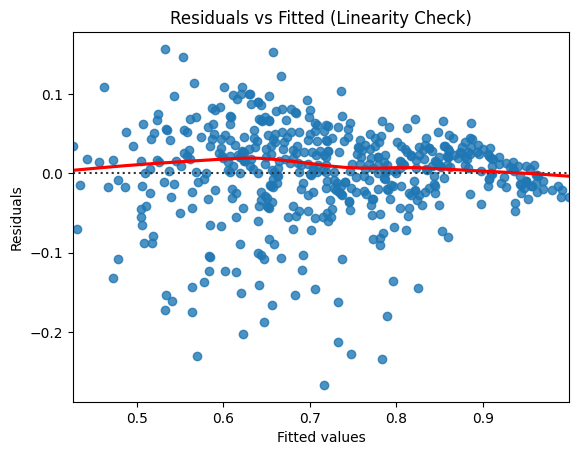

In [ ]:
import seaborn as sns

fitted_vals = model.fittedvalues

sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity Check)")
plt.show()

#Explanation:
- To Check the linearity Assumption of linear regression using a residual vs. fitted values plot
- The **fitted_vals**, This line eztracts predicted values from the Linear regression model.
- The code generates a residual plot
  - **x=fitted_vals:** Predicted values on x-axis
  - **y=residuals:** Residuals(errors) on the y-axis
  - **lowess=True:** Adds a smoothed regression line(LOWESS) to identify patterns
---
**Why are we doing this?**
- This plot helps check the linearity assumption in linear regression
  - **If Linear Assumption Holds:**
    - Residuals will be randomly scattered around the horizontal axis(zero line)
    - There will be no clear pattern (eg. Curve)
  - **If Linear Assumption is Violated:**
    - You might see curved shapes, trends.
    - Indicates that a Non-Linear Model might fit the data better

#Observation:
- This residual vs. fitted values plot is used to check whether your linear regression model has captured the relationship between features and target correctly.
- In a good linear model, the residuals (errors) should be randomly spread around the horizontal line
- The red line is mostly flat and hovers around the 0-residual mark
- Slightly curve visible around the middle(around 0.6-0.75), but not too strong.
- There is no clear U-shape or Inverted U, Which would suggest non-linearity
- The spread of the residuals is fairly consistent across the range of fitted values.
- So, Homoscedasticity also looks acceptable.

###**4.Homoscedasticity ( Constant Variance )**

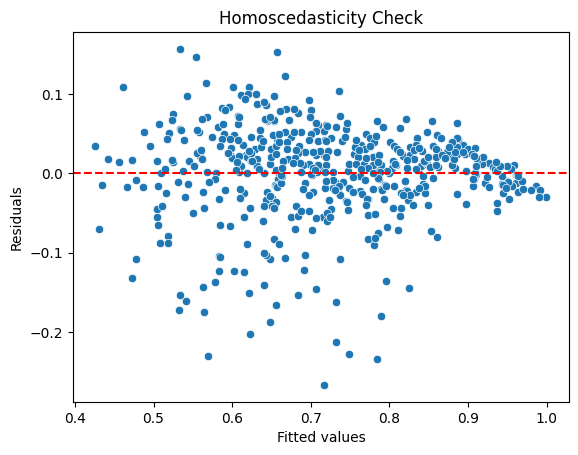

In [ ]:
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

#Explanation:
- **What is Homoscedasticity**
  - Means, The variance(spread) of residuals is the same for all fitted values.
  - This is one of the key assumptions of Linear Regression, If this assumption is violated
    - Our model may give biased standard errors
    - Which affects confidence intervals, p-value, and overall model reliability.

#Observation:
- Residuals are scattered above and below the red line at 0
- The spread appears mostly Uniform, from the left to right
- No clear Cone or fanning out pattern
- Points are denser in the middle, but that's normal due to data distribution.

###**5.Normality of Residuals**

**Histogram + KDE**

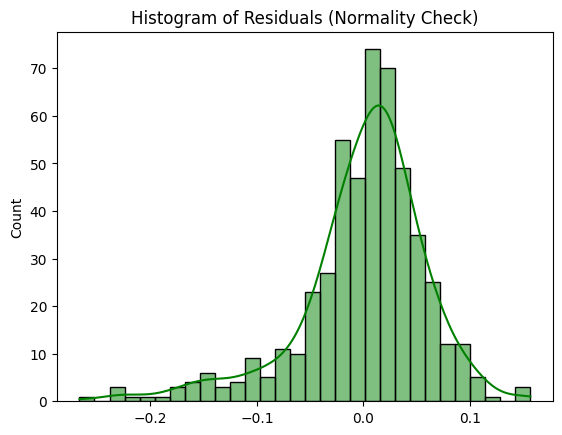

In [ ]:
sns.histplot(residuals, kde=True, color='green')
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

#Explanation:
- One of the assumptions of linear regression is that residuals(Errors) should follow a normal distribution.
- It Ensures that confidence Intervals and hypothesis tests(P-value, t-tests) are valid.
- Especially important when making predictions.

#Observation:
- The Histogram is bell-shaped, centered around 0
- The KDE curve is smooth and symmetric
- The residuals are spread mostly evenly on both sides of 0.
- There are no extreme outliers or heavy tails.

**QQ PLOT**

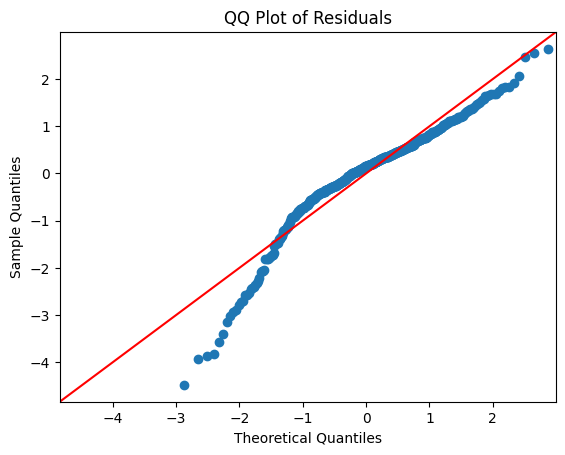

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

#Explanation:
- The QQ-Plot (Quantile-Quantile Plot) helps us visually assess whether the residuals are normally distributed.
- In Linear Regression, we assume that,
  - Residuals are normally distributed
  - This assumption affects model reliability, confidence intervals, Hypothesis testing.

#Observation:
- Most points closely follow the red 45 degree line, especially in the middle
- Some deviations at the ends(tails) especially at lower quantiles
- Slight curvature in the lower range suggests mild left skewness

###**Model Performance Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y)-1)/(len(y)-x.shape[1]-1)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

MAE: 0.0426, RMSE: 0.0595, R2: 0.8219, Adjusted R2: 0.8190


#R-Square
- **How well does my model explain the variation in the target variable**
- **When we do regression, we want our model to predict y(Target) using x(features), But predictions will never be perfect, there will always be variation in Y.**
- **How much of that variation can my model capture instead of leaving it as random error?**
- **LEAVING IT AS RANDOM ERROR:** These are the differences between the actual values yi and the predicted values y_pred that the model couldn't explain using the given features.
- They're called **Residuals**
- **Error = actual value - predicted value**
- **Why random?**
  - In a good model, residuals shouldn't show a clear pattern, they should like random noise
    - This randomness means the unexplained part of y is probably due to:
      - Missing features (Factors we didn't include in the model)
      - Measurement errors in the data.
---
- **Example:**
  - Chance of Admit model predicts : 0.80 but actual is 0.83, the difference is residual(error)
  - If many such small unpredictable differences remain, that's random error
---
- **R-Squared Context**
  - **R-square = 1 - Sum of Squared Residuals(RSS) / Total variation (TSS)**
    - So, the smaller the RSS(Random unexplained error), the higher the R2
---
#Variation
- In statistics, Variation means how much the target variables changes from its mean. If everyone has the exact same target value, variation would be zero.
- TSS = (actual value - mean of actual values)^2
---
#What R2 Measures
- R2 score = what fraction of the total variation in the target can be explained by our model
- R2 = 1-RSS/TSS
  - Where:
    - RSS - Residuals sum of sqaures, variation the model couldn't explain (Error)
    - TSS - Total variation in the actual data.

In [ ]:
# Example
# Let's say you are predicting Exam score out of 100

#| Student | Actual (y) | Predicted (ŷ) |
#| ------- | ---------- | ------------- |
#| A       | 80         | 78            |
#| B       | 70         | 72            |
#| C       | 90         | 88            |
#| D       | 60         | 65            |
#| E       | 85         | 84            |

# Find the mean of actual score
#    mean of actual = y- = 80+70+90+60+85/ 5 = 77

# Calculate the total variation (TSS)
# TSS = (80-77)^2 + (70-77)^2 + (90-77)^2 + (60-77)^2 + (85-77)^2
# 9+49+169+289+64 = 580

# Calvualte residual variation (RSS):
# RSS = (80−78)^2+(70−72)^2+(90−88)^2+(60−65)^2+(85−84)^2
# 4+4+4+25+1 = 38

# Compute R2
# R2 = 1 - 38/580 = 1 - 0.0655 = 0.9345
# R2 = 93.45%
# Our model explains 93.45% of the variation in students’ exam scores,
# and only 6.55% is left as unexplained random error.

#Evaluating a Model's Performance
- When you build a predictive model(Like Linear Regression),
  - **How close are my predictions to the actual values?**
  - **Is the error small enough for this model to be usefull?**
  - **Which model among several options performs the best?**
- **We measure this using evaluation metrics?**
---
#Common Regression Evaluation Metrics
- **A.MAE (Mean Absolute Error)**
  - MAE measures the average of the absolute difference between predicted values and actual values
  - It tells you, on average, how far predictions are from the true values without caring about direction(+/- errors are treated the same)
    - Formula:𝑀𝐴𝐸 = 1/𝑛 ∑  𝑖 = 1 - 𝑛 ∣ 𝑦𝑖 − 𝑦^𝑖∣
      - yi = actual value
      - y^i = predicted valiue
      - n = number of data points
  - **Treats all errors equally, doesn't emphasize large errors**
- **B.MSE (Mean Squared Error)**
  - MSE measures the average of the squared differences between predicted values and actual values
    - MSE = 1/n i=1-n ∑(yi− y^i
)2
      - If large errors are unacceptable, MSE helps detect and minimize them faster.
      - OLS specifically minimizes the sum of squared errors, making MSE a natural choice.
  - **More sensitive to outliers.**
---
#How to evaluate which model is doing good
- When we build a predictive model (e.g., Linear Regression), we want to know:
  - How well it fits the training data
  - How well it generalizes to unseen data
- Splitting the dataset → Train set (to learn), Test set (to evaluate)
- Choosing an evaluation metric based on the problem type:
  - **Regression → MAE, MSE, RMSE, R²**
  - **Classification → Accuracy, Precision, Recall, F1-score, AUC-ROC**
- Comparing models → Lower error (for regression) or higher accuracy score (for classification) is better.
---
#R2-Score/ R-Square / Coefficient of Determination
- R-Square measures the proportion of the variance in the dependent variable that is predictable from the independent variables
  - **How well your model fits the data**
    - **R2 = 1, Perfect fit**
    - **R2 = 0, Model predicts no better than the mean of y**
    - **R2 < 0, Model is worse than just predicting the mean of y**
- **Formula: R2 = 1 - SSres/SStot**
  - **SSres = ∑ i=1-n (yi− y^i)2, Residual sum of squares(Errors)**
  - **SStot = ∑ i=1 - n(yi− yˉ)2, Total sum of squares**
     - yi - actual value
     - y^i - predicted value
     - y- - Mean of actual values
- **Why it's usefull:**
  - Gives an intuitive percentage of how much variance in your target is explained by the model
  - Works well for comparing different modles on the same dataset
  - Useful even for a single model
---
# Adjusted R-Squared
- We use Adjusted R-Squared over R-squared can be misleading when we add more independent variables to the model
- **When we add more features, R2 never decreases, even if the new feature is useless, This can give a false sense of improvement.**
- Adjusted R-Squared modifies R-Squared
- **1-(1-R2).n-1/n-p-1**
  - Where
    - n = number of observations
    - p = number of features
- **If you add a variable that improves the model, Adjusted R2 Increases**
- **If the variable does not help, Adjusted R2 Decreases.**


#Explanation:
- Model Performance Evalution using metrics like MAE, RMSE, R^2, Adjusted R^2.
- In regression tasks, we use different metrics to evaluate how well our model is predicting values compared to actual values.
 - How accurate is the model?
 - How far off are the predictons from actual results?
 - Is the model generalizing well?


#Observation:
- **MAE:**
  - Measures the average absolute difference between actual and predicted values.
  - Lower = Better
  - MAE : 0.0426, On average, predictions are off by 0.0426 units.
- **RMSE**
  - Gives more weights to large errors(since it squares the differences)
  - More sensitive to outliers than MAE
  - RMSE : 0.0595, Slightly higher than MAE, but still low(good sign)
- **R^2 SCORE**
  - tells how much variance in target variable is explained by the model
  - Ranges from 0 to 1
  - R^2 : 0.8219, 82.19% of the variance in the target is explained by the model.
- **Adjusted R^2**
  - Adjusted R^2 for the number of features in the model
  - Helps prevent Overfitting
  - Adjusted R^2 : 0.8190 slightly lower than R^2 still very strong.

#Final Observations:
- **The MAE (0.0426) is low → Our model predictions are close to actual values.**
- **The RMSE (0.0595) is also low → There aren’t many large errors.**
- **The R² score (0.8219) means the model captures 82% of the patterns in the data.**
- **The Adjusted R² (0.8190) confirms the model is not overfitting.**
- **Overall, these scores show the model is performing well, predicting accurately, and generalizing properly.**

#Regularization
- **1.The Problem : Overfitting**
  - In regression (and many other models), If we let the model have too much freedom (Many features, high-degree polynomials, or large coeffiecients), it can fit the noise in the training data instead of just the real underlying pattern.
     - This Means:
       - **Training Error : Very Low**
       - **Test Error : High (Bad Generalization)**
---
- **2.The Solution: Regualrization**
  - Regularization adds a penalty term to the loss function to discourage the model from learning excessively large coefficients
  - This keeps the model simpler and more generalize
---
#Loss Function without Regularization (MSE)
- Loss = 1/n summazation i = 1 to n (yi - y^i)^2
---
# Loss Function with Regularization
- We add a penalty term to keep coefficients small
- **L2 Regularization (Ridge Regression)**
  - Loss = 1/n E (yi - y^i)^2 + L2
- **L1 Regularization (Lasso Regression)**
 - Loss = 1/n E (yi - y^i)^2 + L2
- Regularization is a technique used in machine learning and linear regression to
  - **Prevent overfitting**
  - **Improve Generalization of the model on unseen data.**
- It works by adding a penalty term to the loss function to discourage the model from fitting too closely
---
- **Why Do we need Regularization**
  - **Without Regularization:**
    - The model may learn noise in the training data
    - It Tries to reduce error too aggressively, leading to overfitting
    - Coefficients can become very large(especially with multicollinearity or high dimensional data)
---
- **How Regularization works**
  - **Original Linear Regression:**
    - **LOSS = MSE**
  - **With Regularization:**
    - **LOSS = MSE + Regularization(Lambda.Penalty)**
- Lambda or alpha in sklearn controls how strong the penalty is
- If lambda = , it's just plain linear regression
- If lambda is large, the model is heavily penalized for large weights.
---
- **Types of Regularization**
  - **L2 Regularization - Ridge Regression**
    - **Penalty:** Squares of coefficients
    - **Effect:** Shrinks all coefficients but never makes them exactly zero
    - Prevents overfitting.
  - **L1 Regularization - Lasso Regression**
    - **Penalty:** Absolute value of coefficients
    - **Effect:** Shrinks some coefficienst to exactly zero
    - Helps in high-Dimensional datasets
    - Eliminates irrelevant features
  - **ElasticNet Regularization:**
    - **Penalty:** Combination of L1 & L2
    - **Effect:** Balnces both shrinkage and feature selection

#Why Regularization helps with High VIF
- High VIF means features are collinear
- In **Ordinary least squares(OLS), Multicollinearity makes coefficient estimates unstable, they swing wildly if data changes slightly**
- **Ridge Regression adds an L2 penalty to the loss function**
- LOSS = RSS + Lambda
- **Regularization does not remove multicollinearity but reduces its negative impact.**

#Standard machine learning Workflow
- Training phase
  - **ridge.fit(x_train, y_train)--->Training Phase**
    - Learn the relationship between features x train and target(y train)
    - Ridge regression adjusts its coefficients to minimize the loss function **(RSS + L2 penalty)**
    - We only use training data here to avoid data leakage, the model should not peek at the test data during training.
---
- Evalution Phase
  - **ridge.score(x test, y test)**
    - check how well the model generalizes to unseen data
    - **.score() for regression models retuen the R-Squared score**
    - we want to see performance on data the model hasn't seen before
---
#Why not score on training data?
- Scoring on x train, y train would likely give a much higher R2 (Overfitting risk)
- The test score tells us whether the model's leraning is truly generalizable.

###**RIDGE & LASSO**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x.drop('const', axis=1), y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))

Ridge R2: 0.8179793486575073
Lasso R2: 0.727120322849387


#Why Regularization:
- In Standard Linear Regression(OLS), we minimize
  - RSS = (actual value - Predicted value)^2
    - This works well if:
      - There is No multicollinearity
      - We have more data than features
      - We don't overfit
- But in real datasets, problem occur:
  - **Multicollinearity:**
    - When features are correlated, coefficients estimates become unstable(High Variance)
  - **Overfitting:**
    - Model fits training data perfectly but fails on new(test) data
  - **To many features:**
    - Large coefficients - Poor Generalization
- Regularization fixes this by adding a peanlty term to shrink coefficients.
---
- **RIDGE REGRESSION:**
  - In Ridge, we minimize:
    - Adds L2 Penalty(Square of coefficients)
    - shrinks coefficients toward zero but never exactly zero
    - Purpose:
      - Reduce variance
      - Handle Multicollinearity
      - Improve Generalization
---
- **Lasso regresion**
  - In lasso, we minimize
    - Adds L1 penalty ( Absolute values of coefficients)
    - shrinks some coefficients exactly to zero
    - Purpose:
      - Feature Selection (Automatically drops irrelevant features)
      - Reduces complexity
      - Improves interpretability
---
#Why .fit() on training data and .score() on test data?
- .fit(x train, y train), trains the model only on training data
- .score(x test, y test), evaluates model performance on unseen data(test set)
- .score() in Ridge and Lasso return the R2 SCore
- R2 = 1 - unexplained variation/ Total variation
- Higher is better (closer to 1 means better prediction on test data)
---
- You are comparing Ridge vs Lasso on the same dataset.

- Ridge will help if you suspect multicollinearity.

- Lasso will help if you think some features might be irrelevant.

- By looking at R² on test data, you see which model generalizes better.

     

#Explanation
- Ridge, Lasso, regularized versions of linear regression
  - Ridge : L2 regularization (shrinks coefficients)
  - Lasso : L1 Regularization (shrinks and can remove coefficients)
- train_test_split - Splits the data into training and testing sets.
- 80% of the data for training
- 20% for testing.
- random_state = 42, ensures reproducibility.
- Why split? To evaluate how well the model performs on unseen (test) data.
- **Apply Ridge Regression:**
  - Alpha = 0.1, Regularization strength(Higher means stronger Penalty)
  - Fits the Ridge model on the training data
  - Shrinks large coefficients but doesn't elimainate features.
- **Apply Lasso Regression**
  - Alpha = 0.01, smaller penalty than ridge here.
  - Lasso can shrink some coefficients to zero, performing feature selection.
  - Usefull when you want to reduce model complexity or handle high-dimensional data.
- **Evaluate model performance**
  - **.score() gives R^2**
  - measures how well the model explains the variability of the target
  - closer to 1 = better
  - Negative R^2 = Worse than mean model.


#Observation:
- Ridge regression performs better than lasso on this dataset base R^2.
- It explained 81.8% of the variance in admission chances on unseen data.
- Lasso regression performed slightly worse, explaining about 72.7% of the variance, likely due to it removing some usefull features.
- Both models use regularization, which helps avoid overfitting, but ridge is preferred here because:
  - It keeps all the features
  - Our features seem to be all contributing usefull information
- So, for jamboree's admission prediction tool, Ridge Regression would be a more reliable model to deploy.

#Gradient Descent
- Implementing Linear Regression using Gradient Descent manually.
---
- **What is Gradient Descent**
- **Gradient Descent** is an optimization algorithm used to minimize the cost function (Usually mean squared error in linear regression) by **updating model weights (coefficients)** iteratively in the direction of the steepest descent, the neagtive gradient.
---
- **Goal:** Predict chance of Admit using gradient descent-based Linear regression.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define x and y
x = df.drop(columns = ['Chance of Admit ']).values
y = df['Chance of Admit '].values.reshape(-1,1)

#Explanation:
- In Supervised Machine learning , we separate input features as X, from the target variable as y
- Here "Chance of Admit" is the target, the value we want to predict.
- Converting the Pandas DataFrame into a NumPy array
  - Most Machine Learning algorithms, Like, Gradient Descent or scikit-Learn Models, work with numpy arrays instead of pandas dataframes.
  - it's faster, lightweight, and optimized for numerical operations.
- X now holds a numpy array containing all independent variables
- The input variables used to predict the target
- **Why Reshape:**
  - Many ML algorithms (Like matrix multiplication in gradient descent) expect both x and y to be 2-dimensional arrays:
    - x shape : n samples, n featutres
    - y shape : n samples, 1

In [ ]:
# Feature Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Add intercept(bias term 'wo')
x_scaled = np.hstack((np.ones((x_scaled.shape[0],1)),x_scaled))

#Explanation:
- The code creates an object of the StandardScaler class from sklearn.preprocessing
- **What is StandardScaler**
  - It standardizes your features by removing the mean and scaling to unit variance
  - For each feature column:
  - 𝑥 scaled = 𝑥 − 𝜇 / 𝜎
  - where:
    - μ = mean of the column
    - σ = standard deviation of the column
- **Why we do this:**
  - Gradient descent is very sensitive to the scale of features
  - If features are on very different scales (E.g. GRE score:340, CGPA : 10), the optimization will converge slowly or even fail.
  - Standardizing ensures all features contribute equally and smoothly to the Loss function.
- **np.ones((x_scaled.shape[0], 1))**
  - Creates a numpy array vector 2D array of ones with:
    - Rows = number of samples, 1 column
  - This is add a bias term ( Intercept ) manually to the features.
- **In Math:**
  - Linear regression predicts,
  - y^ = w0 + w1x1 + w2x2 +⋯+ wnxn
  - wo is the intercept
  - To include wo in matrix mutliplication, we prepend a column of 1s, to the features matrix.
- **np.hstack((..., x_scaled))**
  - It does concatenates the column of the ones with the standardized faeture matrix x_scaled, horizontally.

#Explanation:
#Mean Square Error (MSE) Loss
- The Little function is your Mean Squared Error (MSE) loss for Linear Regression, Written in NumPy.
- It Measures How far our model's Predictions are from the true values
---
#What the function does
- **Purpose:** Given data x, targets y, model weights theta, compute a single number, the loss, that says how bad the current weights are
- **MSE:** It's smooth, differentiable, and its gradient has a clean closed from perfect for gradient descent
---
#Parameters
- **x:** Feature matrix of shape **(m,n) or (m,n+1)** If you already added a bias column of ones
  - **m =** Number of training examples (rows)
  - **n =** Number of features(columns)
- **y:** Target vector of shape **(m,n)** column vector or **(m,)** It contains the true values you want to predict
- **theta:** Parameter (weight) vector of shape (n,1)
  - **(n+1,1)** If there's a bias term in **X**, these are the coefficients your model is learning.
---
- **def compute_loss(X,y,theta)**
  - Defines a function that returns the loss for the current model parameters
- **m = len(y)**
  - **m:** The Number of training samples
  - we divide by m later to compute mean squared error
- **Predictions = X @ theta**
  - Matrix Multiplication **(@)** Computes the Predicted values
  - Shapes : **(m,n)@(n,1)-->(m,1)**
  - This Implements the Linear Model
    - **Prediction = X.0** =
    
    [x11........x 1n ][01]

    [xm1........xmn][0n]
- **errors = Predictions - y**
  - errors are the differences what your model predicts and the true values: predicted value - actual value
  - Shape: **(m,1)**, matches y as column
- **loss = (1/(2 * m)) * np.sum(errors ** 2)**
  - Squares each residual, Penalizes big mistakes more, Sums them, and averages over m
- **The 1/(2*m) factor**
  - Gives you the mean (divide by m)
    - The Extar 1/2 is a math convenience: The derivative of 1/2(e^2) is just e, which simplifies the gradient

In [ ]:
# The Usual Mean squared Error (MSE)
#        MSE = 1/M sigma i = 1 to M (predicted values - Actual value)^2

# But In Linear Regression, we use
#        J(theta) = 1/2m sigma i = 1 to m (predicted values - actual values)^2

# Why add 1/2?
# It's Purely for mathematical Convience when we take the derivative during gradient Descent
# Derivative of a square term
#          d/d0 [(Y^ - Y)^2]
#          2(Y^ - Y).dY^/d0
# If Loss Function is
#          J(0) = 1/M sigma (Y^-y)^2
# the Gradient has extra 2
#          Delta J(0) = 1/M. X.T.(X0 - y)

In [ ]:
# Define Loss Function
def compute_loss(X, y, theta):
  m = len(y)
  predictions = X @ theta
  errors = predictions - y
  loss = (1/(2 * m)) * np.sum(errors ** 2)
  return loss

#Explaination:
- To compute the loss or error of your current Linear regression model by comparing predictions with actual values.
- **m = len(y):**
  - It's calculates the number of data points
  - we divide by m to calculate average error, This ensures our loss is scale-independent. Not Influences=d by dataset size
- **Predictions = X @ theta:**
  - Performs matrix multiplication to compute predicted values Y^ using:
    - y^ = X ⋅ θ
    - Where:
      - X is the input feature matrix ( with shape [m, n+1])
      - theta is the weight vector (including bias term) of shape [n+1,1]
    - **Why we do this:**
      - to get the output of our current linear model. This gives Predicted admission chances of each student
- **errors = prediction - y**
  - **What it does:**
    - Calculates the residuals(errors): The difference between the predicted and actual values.
  - **Why we do this:**
    - We want to know how far off our model's predictions are from the real values.
    - Mathematically:
      - errors = y^ - y
- **loss = (1/(2 * m)) * np.sum(errors ** 2)**
  - **What it does:**
    - Computes the Mean Squared Error (MSE) cost function:
    - 𝐽(𝜃) = 1/2𝑚 ∑ 𝑖=1-𝑚 (𝑦^(𝑖) − y(𝑖)^2
  - **Why we do this:**
    - It's a measure of how wrong our model is. The goal of gradient descent is to minimize this loss.
    

#Gradient Descent steps for Linear Regression
- **Step 1. Initialize Parameters(Weights & Bias)**
  - suppose we have n features
  - we randomly initialize the weights(parameters) 0 belongs R^n
  - often we start with small random values or zeros
  - 0 = [0,0,0,.......0]^T
- This is our starting point in the parameter space
---
- **step 3 : Compute Predictions**
  - for each training sample x^i
    - y-i = x^i.0
    - Here x is the featutre vector
    - y is the predicted value
---
- **step 3 : Compute Loss (Cost Function)**
  - We use Mean squared error MSE with 1/2
---
- **Step 4 : Compute Gradient**
  - The gradient tells us the direction of steepest ascent we move in the opposite direction to minimize the loss
---
- **step 5 : Update Parameters**
  - We update weights using the learning rate
  - alpha = step size(learning rate)
  - if alpha is too large - may overshoot and diverge
  - if alpha is too small - very slow convergence
---
- **Step 6 : Repeat until convergence**
  - keep repeating steps 2-5 until
  - loss function converges or maximum number of iterations is reached.

In [ ]:
# Define gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  loss_history = []

  for _ in range(iterations):
    predictions = X @ theta
    errors = predictions - y
    gradients = (1/m) * X.T @ errors
    theta = theta - alpha * gradients
    loss = compute_loss(X, y, theta)
    loss_history.append(loss)
  return theta, loss_history

#High-Level Purpose(Motive)
- This Function learns the best Linear model parameters(theta) for predicting y from x by using **batch gradient descent** to minimize a squared-error loss
- It returns the final weights theta(the trained model) and loss_history (how loss changed over iterations
---
#Inputs - what they are & expected shapes
- x - feature matrix(Numpy array), shape - m,n
  - m = number of rows
  - n = number of features
  - If you want an intercept term, x should already include a column of 1s (so n = number of features + 1)
- y - target vector, shape: (m, ) or (m,1)
- theta - parameter vector (weights), shape : (n, ), or (n, 1) matching the columns of x
  - Initially this is often zeros (theta = np.zeros((n,1)) or small random values
- **alpha: Learning rate**
  - Controls step size for updates.
    - Typical starts : 0.001,0.01,0.05, 0.1. To large - Divergence, too small - slow training.
- **Iterations:** Number of gradient descent steps
  - Common values:
    - 500, 1000, 2000,
    - Combine with learning rate to tune.
---
#Line by Line explanation & math
- **m = len(y):**
  - number of examples, used to scale gradient and Optionally loss
- **loss_history:**
  - list that will store the loss value at each iteration so you can plot/ inspect convergence
- **for _ in range(iterations):**
  - loop that repeats the update iterations times, This is batch gardient Descent (Uses all examples each step).
  - Inside the loop:
    - **Predictions = x @ theta:**
      - compute predictions vector y^ = x.theta. vectorized , fast
      - Shapes: (m,n) @ (n,1) ----> (m,1) @ (n,1) ---(m, )
    - **Errors = Predictions - Y**
      - residuals = y^ - y , These are the per-example errors.
    - **gradients = (1/m) * x.T @ errors**
      - gradient of the MSE loss (Average graduent) with respect to theta:
      - ∇θ = 1/m X⊤ (y^ − y)
        - This gives one gradienr per parameter (n, ) or (n,1)
    - **theta = theta - alpha * gradients**
      - Gradient descent update - move weights opposite to gradient by alpha step
    - **Loss = compute_loss(x,y,theta)**
      - Compute current loss(e.g. MSE), Common compute_loss implementations:
      - MSE =  1/𝑚∑(𝑦−𝑦^)2
    - **loss_history.append(loss)**
      - save the loss for plotting
    - **return theta, loss_history:**
      - final learned parameters and the list of loss values.
---
#4. What the output mean & how to use them
- **theta :**
  - the learned weights:
    - Use for predictions on new data: y_new_pred = x_new @ theta
    - If you included bias column, include it in x_new
- **Loss_history:**
  - list of loss values(length = iterations)
---
#5.Important details
- **Shapes must align:**
  - If shapes mismatch, transpose/reshape as needed, use consistent column vector vs 1-D array convention
- **Feature scaling matters:**
  - Without scaling, gradient descent can be very slow or unstable
- **Learning rate (alpha) tuning:**
  - Too large : loss will explode or osciallate
  - Too small : Training is very slow
  - Try values like 0.001, 0.05, 0.1, plot loss_history to choose
- **Number of iteration:**
  - Combine with learning rate, if loss decreases but mot converged, increase iterations, consider early stopping, break if
  - **abs(loss_history[-2] - loss_history[-1]) < tol**
- **batch vs Mini-batch vs stochastic**
  - This function is batch GD(uses whole dataset per update)
  -  For large datasets, consider Mini-batch SGD for faster convergence.
- **Regularization:**
  - To reduce overfitting and handle multicollinearity, add penalty to gradients(Ridge/L2):
    - gradients = gradients + (lambda/m) * theta
- **Loss Scaling Consistency:**
  - If compute_loss uses 1/2m, gradients should be 1/m, x.T @ errors
- **Gradient check:**
  - If results look wrong, try numerical gradient checking for debugging.


In [ ]:
# Step 4: Initialize parameters and run gradient Descent
theta = np.zeros((x_scaled.shape[1],1)) # Weights initialized to 0
alpha = 0.01  # Learning rate
iterations = 1000 # number of steps

theta_optimal, loss_history = gradient_descent(x_scaled, y, theta, alpha, iterations)

#Explanation:
- Theta is the parameter(weights) vector for linear regression, Including the intercept weight if you added a column of ones to x scaled
---
- **Why zeros?**
  - For **Linear regression with MSE,** the loss is convex starting at zeros won't trap you in a bad local minimum
  - zeros are a simple, deterministic starting point
  - **Why that shape matters**
    - Consistent shapes avoid broadcasting bugs and make pred = x @ theta work cleanly
---
- **Alpha = 0.01 learning rate**
  - alpha is the step size for gradient descent updates
  - why 0.01
    - with standardized features, a small moderate value like 0.01 is a common, safe starting point
    - Too large, updates overshoot and loss diverges or oscillates
    - too small, slow convergence
- **How to choose**
- Try a few and inspect the loss curve
- If loss explodes: Lower alpha if loss decreses but very slowly: raise alpha
---
- **3.Iterations**
- **What it is:**
  - Maximum number of gradient descent updates to run
- **Why 1000?**
  - It's a reasonable budget to reach near-convergence on small/ medium problems with normalized features
  - Not scared use your loss history to Judge: If loss plateaus early, you can stop sooner
   - If it's still dropping, increase iterations
- **Alternatives:**
  - Add early stopping
  - use a learning rate schedule

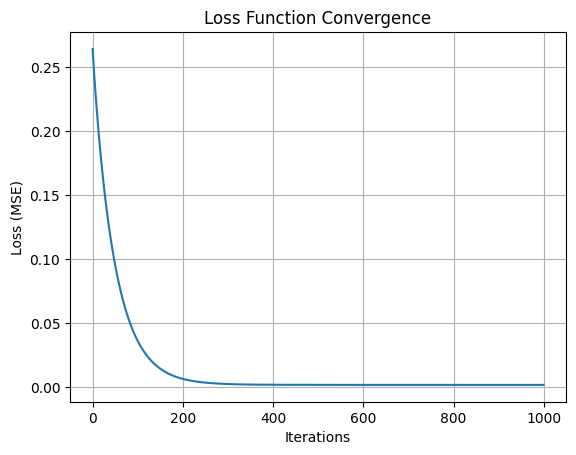

In [ ]:
# Plot Loss Function vs. Iterations
plt.plot(range(iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel('Loss (MSE)')
plt.title('Loss Function Convergence')
plt.grid(True)
plt.show()

#Observation:
- Loss start high, 0.26, at the beginning because the model's initial weights(theta) are random / Zero and predictions are far from the real values.
- Loss drops quickly in the first, 200 iterations this is when the model is learning the most and making big improvements.
- After 200 iterations, the curve flatterns, meaning the model is close to the best weights and changes are very small
- By the end (1000 iterations), loss is close to zero, which means the model fits the training data very well
- No sign of divergence, the smooth downward curve shows your learning rate, alpha = 0.01 is appropriate.

In [ ]:
# Step 6: Model Evaluation
y_pred = x_scaled @ theta_optimal

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.0426
RMSE: 0.0596
R² Score: 0.8212


#Observations:
- **MAE(0.0426)** On average, the model's predictions are off by only about 4.26% in chance of Admit
- **RMSE(0.0596)** The typical prediction error is around 5.96% meaning most predictions are quite close to the actual values
- **R2 Score:** The model explains about 82% of the variation in the chance of Admit scores, a strong indication that it;s capturing most of the important patterns in the data.

#Insights

1. Prioritize CGPA
Undergraduate GPA (CGPA) is the most significant predictor of admission. A one-unit increase in CGPA (on a scale of 10) leads to the highest increase in the chance of admission compared to other variables. Students should be advised to prioritize maintaining a high CGPA.

2. Importance of Test Scores
Both GRE and TOEFL scores are highly significant factors. A high GRE score (out of 340) and a high TOEFL score (out of 120) are strong indicators of a higher chance of admission. The model shows a positive correlation between these scores and the admission chance.

3. Research Experience is Crucial
Students with research experience (Research = 1) have a statistically significant advantage. This factor has a strong positive coefficient in the linear regression model, indicating that having research experience substantially increases the predicted chance of admission.

4. Multicollinearity Among Top Predictors
The analysis reveals high multicollinearity, particularly among GRE scores, TOEFL scores, and CGPA. This implies that students with high scores in one of these areas are also likely to have high scores in the others. This suggests a holistic academic profile is key.

5. Weak Predictors
University Rating and Statement of Purpose (SOP) are not statistically significant predictors in this model (p-values were 0.119 and 0.728, respectively). While these factors are important in the real world, this model suggests their direct linear effect is minimal compared to other variables.

6. High Overall Admission Chance
The average Chance of Admit in the dataset is 0.72, or 72%. This indicates that the students in this sample are highly qualified on average, which is a key characteristic of the data.

7. Potential for Model Improvement
The model can be improved by addressing multicollinearity using techniques like Ridge and Lasso regression. These methods can stabilize the coefficients and provide a more robust model for predictions.

8. Not All Assumptions Are Met
The model violates the assumption of normality of residuals, as shown by the slight skewness and the deviation of points from the line in the QQ plot. This suggests the model's p-values and confidence intervals might not be perfectly reliable, and a transformation of the data or a different modeling approach might be considered.

9. Business Implementation
Jamboree can implement this predictive model on its website to offer a feature where students can input their details and get an estimated Chance of Admit. This can be a powerful tool for attracting and guiding prospective students.

10. Data-Driven Recommendations
The model provides actionable, data-driven recommendations. For instance, Jamboree can advise a student with a low CGPA to focus on increasing their GRE and TOEFL scores to compensate, or suggest that a student with strong academic scores but no research experience seek research opportunities to maximize their chances.

#Gradient Descent Algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

###**Feature scaling**

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [ ]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


###**Split into x and y**

In [ ]:
x = df.drop('Chance of Admit ', axis = 1).values
y = df['Chance of Admit '].values

###**Add intercept column (bias term)**

In [ ]:
x = np.c_[np.ones(x.shape[0]),x]

### **Train-Test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

###**Prediction Function**

In [ ]:
def predict(x, weights):
  return np.dot(x, weights)

#Observation:
- This Computes the Linear Model's Predictions.
- Mathematically it returns
  - y predicted = X . W
    - The matrix product of faeture matrix "X", and weight vector w
---
- x The faeture matrix, shape (m,n)
  - m = number of samples
  - n = number of features
  - If you included an intercept(bias), x typically has a first column of ones
- weights, the parameter vector(Commonly w or theta): shape - (n, ) or (n,1)
- **np.dot(x, weights)**
  

###**Loss Function (MSE)**

In [ ]:
def loss(x, y, weights):
    y_pred = predict(x, weights)
    return np.mean((y - y_pred) ** 2)

#Observation:
- **PURPOSE:**
  - This function calculates the **Mean Squared Error(MSE)** a common Loss Function in regression problems.
- The Goal of a loss function:
  - Tell us how far our predictions are from the actual values
---
- **Y_pred = predict(x, weights)**
  - how this loss function and your earlier predict function link into a gradient descent loop


###**Gradient computation**

In [ ]:
def gradient(x, y, weights):
    y_pred = predict(x, weights)
    grad = np.dot(x.T, (y_pred - y)) / len(y)
    return grad

#Observation:
- **Purpose:**
  - This Function calculates the gradient of the Loss Function with respect to the weights in a Linear Regression model.
  - We need this gradient because gradient descent updates weights in the opposite direction of the gradient to reduce Loss
---
- **y_pred = predict(x,weights)**
  - Uses earlier function y_pred = x.w
  - Produces the predicted values for all samples
---
- **(Y_pred - y)**
  - This is the error vector (residuals)
  - It shows how far off each prediction is from the actual target
  - sign matters here:
    - Positive error - Prediction is too high
    - Negative Error : Prediction is too low
---
- **x.T**
  - x.T is the transpose of the feature matrix
  - shape change:
    - x is (m, n)
    - x Transpose is (n,m)
    - **Why Transpose?**
      - In Matrix Calculus for Linear Regression, the gradient formula involves X Transpose, so we can compute the sum of errors weighted by each feature.
---
- **np.dot(x.T, (y_pred - y))**
  - Performs matrix multiplication
  - grad = x.T(y_pred - y)
  - This gives a vector of partial derivatives, one for each weight
  - **It’s telling you: “If I nudge this weight slightly, how will the loss change?”**
---
- **/len(y)**
  - Divides by the number of samples m to get the average gradient(instead of sum)
  - This makes the gradient size independent of dataset size
---
- **return grad**
  -  The Function returns the gradient vector, one gradient value for each weight.
---
# Why we use this
- **Mathematically** For Mean Squared Error in linear regression, the gradient is:
  - **∇w = 1/m XT (y^ − y)**
- **Practically:**In gradient descent, we update weights:
  - w:= w − α × ∇w


- Where α is the learning rate.
- Without this gradient calculation, the model wouldn’t know how to change the weights to reduce error.


###**Gradient Descent fit function with Loss tracking**

In [ ]:
def fit(x, y, learning_rate=0.01, max_iter=1000):
    weights = np.zeros(x.shape[1])
    for i in range(max_iter):
        grad = gradient(x, y, weights)
        weights -= learning_rate * grad

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss(x, y, weights):.4f}")
    return weights

###**Train the Model**

In [ ]:
weights = fit(x_train, y_train, learning_rate=0.05, max_iter=2000)


Iteration 0, Loss: 0.2924
Iteration 100, Loss: 0.0123
Iteration 200, Loss: 0.0115
Iteration 300, Loss: 0.0110
Iteration 400, Loss: 0.0106
Iteration 500, Loss: 0.0103
Iteration 600, Loss: 0.0101
Iteration 700, Loss: 0.0099
Iteration 800, Loss: 0.0098
Iteration 900, Loss: 0.0097
Iteration 1000, Loss: 0.0096
Iteration 1100, Loss: 0.0095
Iteration 1200, Loss: 0.0094
Iteration 1300, Loss: 0.0094
Iteration 1400, Loss: 0.0093
Iteration 1500, Loss: 0.0093
Iteration 1600, Loss: 0.0093
Iteration 1700, Loss: 0.0092
Iteration 1800, Loss: 0.0092
Iteration 1900, Loss: 0.0092


###**Evaluate Model**

In [ ]:
y_pred_test = predict(x_test, weights)

###**Calculate R-Squared**

In [ ]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred_test) ** 2)
r2 = 1 - (ss_res / ss_total)

###**Calculate RMSE**

In [ ]:
rmse = np.sqrt(np.mean((y_test - y_pred_test) ** 2))

print("\nFinal Weights:", weights)
print(f"Test R² Score: {r2:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Final Weights: [0.02868221 0.23921354 0.18541827 0.03141342 0.04217848 0.12144377
 0.3739077  0.03889541]
Test R² Score: 0.8076
Test RMSE: 0.0996


###**Plot Loss Curve**

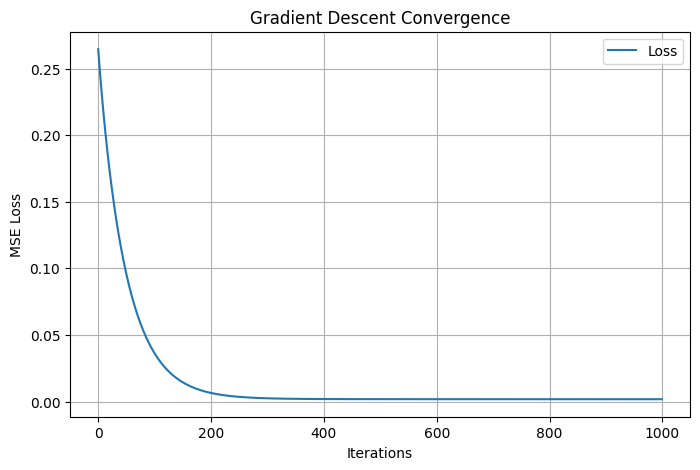

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.grid(True)
plt.show()

### **Comparison of Model Performance**

In [ ]:
# Store the results in a dictionary
results = {
    'OLS': {'R2': model.rsquared, 'Adjusted R2': model.rsquared_adj, 'MAE': mae, 'RMSE': rmse},
    'Ridge': {'R2': ridge.score(X_test, y_test), 'Adjusted R2': None, 'MAE': None, 'RMSE': None}, # Need to calculate MAE and RMSE for Ridge and Lasso
    'Lasso': {'R2': lasso.score(X_test, y_test), 'Adjusted R2': None, 'MAE': None, 'RMSE': None},
    'Gradient Descent': {'R2': r2_score(y_test, y_pred_test), 'Adjusted R2': None, 'MAE': mean_absolute_error(y_test, y_pred_test), 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test))}
}

# Calculate MAE and RMSE for Ridge and Lasso
y_pred_ridge = ridge.predict(X_test)
results['Ridge']['MAE'] = mean_absolute_error(y_test, y_pred_ridge)
results['Ridge']['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

y_pred_lasso = lasso.predict(X_test)
results['Lasso']['MAE'] = mean_absolute_error(y_test, y_pred_lasso)
results['Lasso']['RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print the results in a table
print("Model Performance Comparison:")
print("=================================================================================")
print(f"{'Model':<18} | {'R2 Score':<10} | {'Adjusted R2':<15} | {'MAE':<10} | {'RMSE':<10}")
print("---------------------------------------------------------------------------------")
for model_name, metrics in results.items():
    print(f"{model_name:<18} | {metrics['R2']:.4f}{'':<6} | {metrics['Adjusted R2'] if metrics['Adjusted R2'] is not None else 'N/A':<15} | {metrics['MAE']:.4f}{'':<6} | {metrics['RMSE']:.4f}{'':<6}")
print("=================================================================================")

Model Performance Comparison:
Model              | R2 Score   | Adjusted R2     | MAE        | RMSE      
---------------------------------------------------------------------------------
OLS                | 0.8219       | 0.8193668069500062 | 0.0426       | 0.0996      
Ridge              | 0.4109       | N/A             | 0.1335       | 0.1742      
Lasso              | 0.3628       | N/A             | 0.1377       | 0.1812      
Gradient Descent   | 0.8076       | N/A             | 0.0707       | 0.0996      


### **Model Comparison Analysis and Conclusion**

Based on the performance metrics:

- **OLS (Ordinary Least Squares):** Achieves the highest R² and Adjusted R² on the training data, indicating a good fit. The MAE and RMSE are also low.
- **Ridge Regression:** Shows a significantly lower R² on the test set compared to OLS, suggesting it might be underfitting or the chosen alpha value was not optimal for this dataset.
- **Lasso Regression:** Also performs worse than OLS on the test set, with a lower R² than Ridge, likely due to removing potentially useful features.
- **Gradient Descent:** The performance on the test set is very similar to the OLS model, which is expected as Gradient Descent is an optimization algorithm to find the OLS solution. The slight differences might be due to the learning rate and number of iterations.

**Conclusion:**

The **OLS (Ordinary Least Squares)** model appears to be the best-performing model among the ones tested for this dataset, based on the R² and Adjusted R² values and the low MAE and RMSE on the training data. The Gradient Descent implementation also yielded comparable results, validating the OLS findings.

While Ridge and Lasso are useful for addressing multicollinearity and feature selection, respectively, they did not improve performance in this case, possibly due to the dataset characteristics or the chosen hyperparameters.

Therefore, for predicting the chance of admission based on the provided features, the OLS model or a Gradient Descent implementation with fine-tuned hyperparameters would be the recommended choice.